In [5]:
import arviz as az
from tms_risk.utils import get_all_behavior
from tms_risk.cogmodels.evidence_model import EvidenceModel, EvidenceModelTwoPriors, EvidenceModelGauss, EvidenceModelTwoPriorsDiminishingUtility, EvidenceModelDiminishingUtility
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
traces = {}

for model in list(range(1, 9)) + ['8']:
    traces[f'model {model}'] = az.from_netcdf(f'/data/ds-tmsrisk/derivatives/cogmodels/model-{model}_trace.netcdf')

In [14]:
comparison = az.compare(traces)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/

In [15]:
labels = {'model 1':'2 evidence sds',
'model 2':'2 evidence sds + different priors',
'model 3':'2 evidence sds (Gauss)',
'model 4':'2 evidence sds + diminishing utility',
'model 5':'2 evidence sds + different priors + diminishing utility',
'model 6':'4 evidence sds',
'model 7':'4 evidence sds + different priors',
'model 8':'Khaw et al.'}

In [16]:
comparison.index = comparison.index.map(labels)

In [17]:
comparison


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
2 evidence sds + different priors + diminishing utility,0,-4096.516607,211.388177,0.000000,8.956370e-01,42.389341,0.000000,True,log
2 evidence sds + different priors,1,-4123.736660,189.903176,27.220052,2.630632e-07,41.604079,5.684679,True,log
4 evidence sds,2,-4297.006032,295.203924,200.489425,8.022648e-02,43.104983,23.316651,True,log
4 evidence sds + different priors,3,-4301.882322,192.056967,205.365715,2.074134e-07,41.431922,21.464872,True,log
2 evidence sds + diminishing utility,4,-4449.508677,178.878228,352.992069,2.413686e-02,38.108972,26.315547,False,log
2 evidence sds,5,-4613.363922,147.301358,516.847315,6.933926e-08,35.155726,29.644630,False,log
Khaw et al.,6,-4677.444731,87.337885,580.928124,5.346104e-08,33.715886,30.778089,False,log
2 evidence sds (Gauss),7,-4819.729985,193.550228,723.213378,0.000000e+00,32.287580,33.513852,True,log


<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

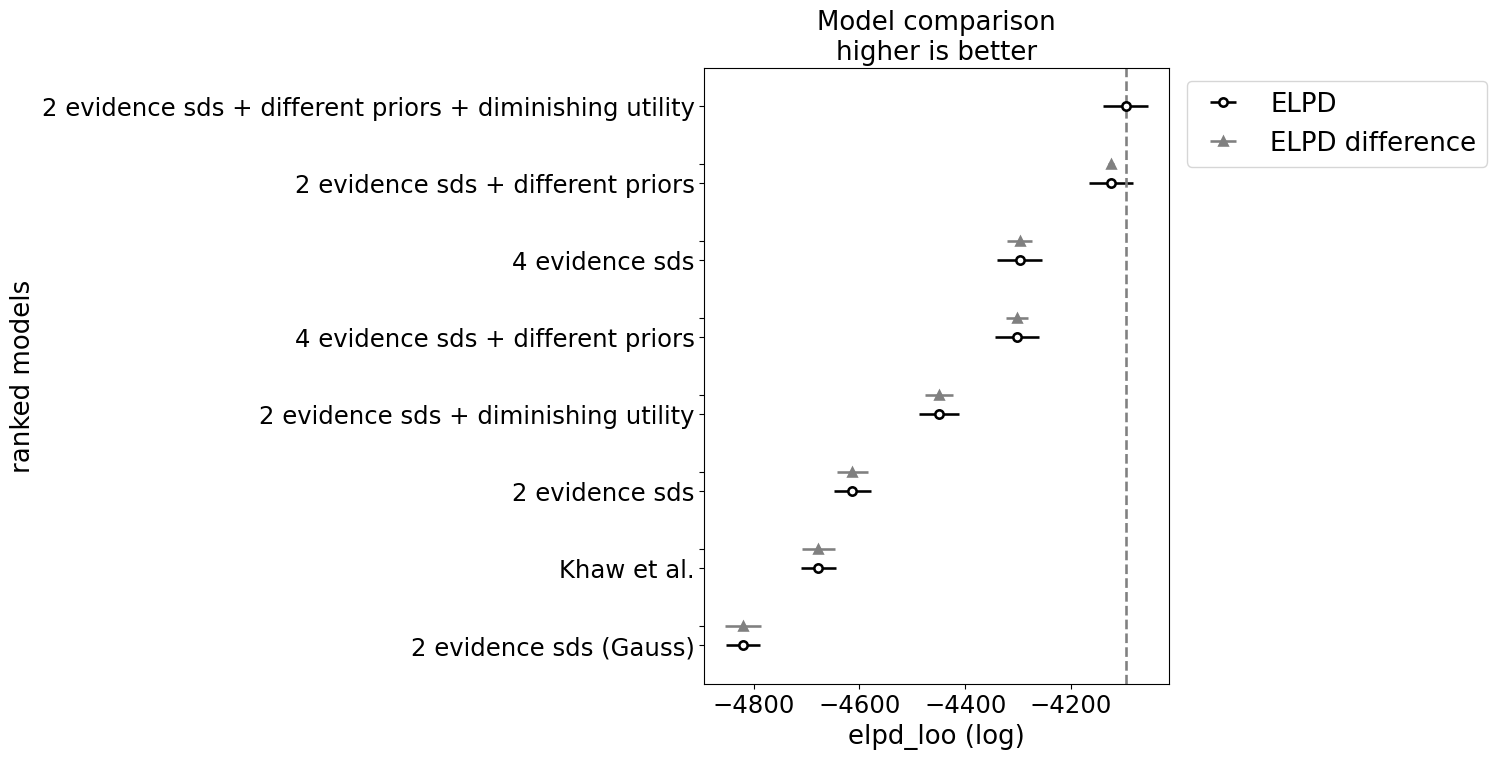

In [18]:
az.plot_compare(comparison)

In [67]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

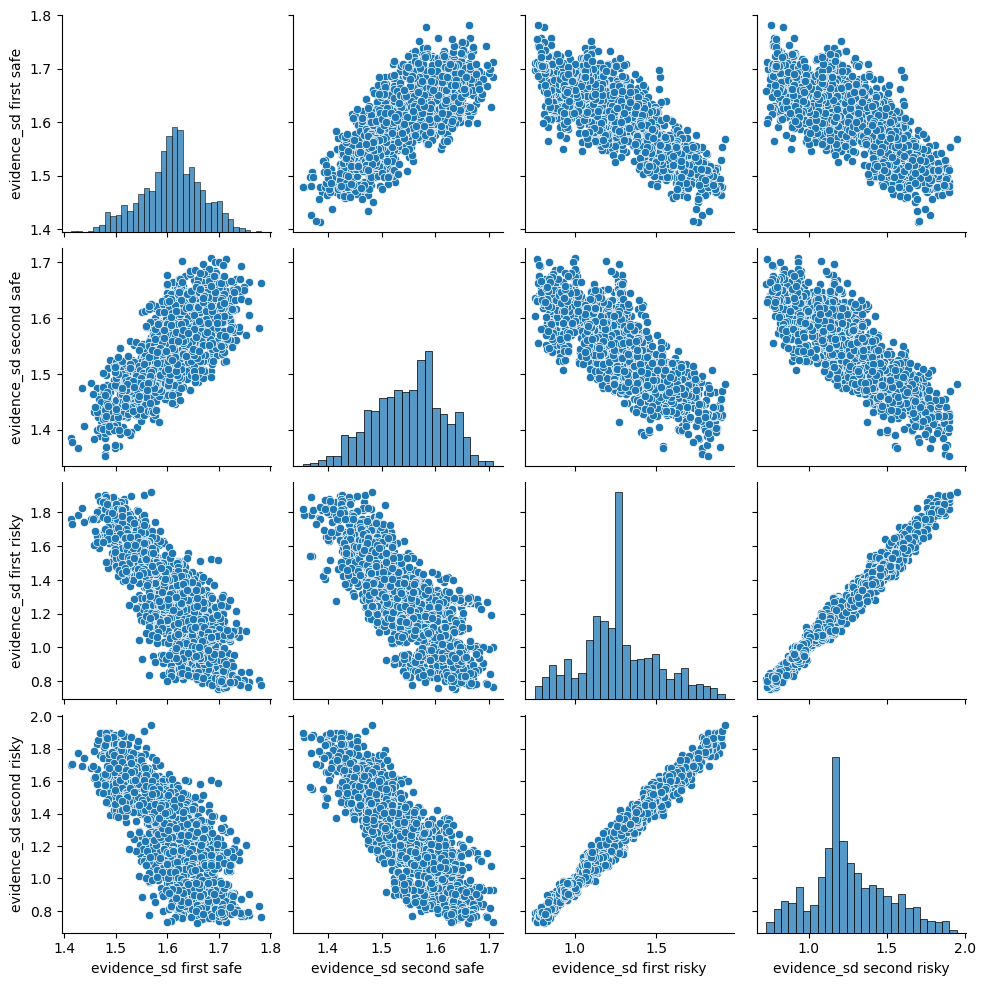

In [70]:
tmp = evidence_sd.unstack(['presentation', 'type'])

tmp.columns = [' '.join(c) for c in tmp.columns]
sns.pairplot(tmp)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_96979/3216990503.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traces['model 5'].posterior['alpha_mu'].to_dataframe())


<AxesSubplot: ylabel='Density'>

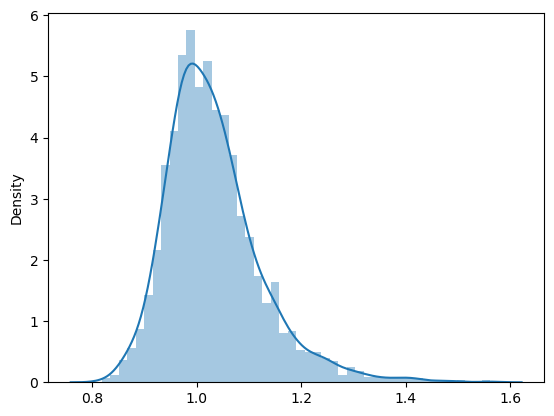

In [76]:
sns.distplot(traces['model 5'].posterior['alpha_mu'].to_dataframe())

In [126]:
def plot_subjectwise_posterior(trace, key, hue=None, ref_value=None, color=None,
palette=sns.color_palette()):
    d = trace.posterior[key].to_dataframe()

    if (color is None) and (hue is None):
        color = palette[0]

    fac = sns.catplot(x='subject', y=key, hue=hue, data=d.reset_index(),
    kind='violin', aspect=8, color=color, palette=palette if hue is not None else None)

    if ref_value:
        fac.map(lambda *args, **kwargs: plt.axhline(ref_value, c='k', ls='--'))


/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


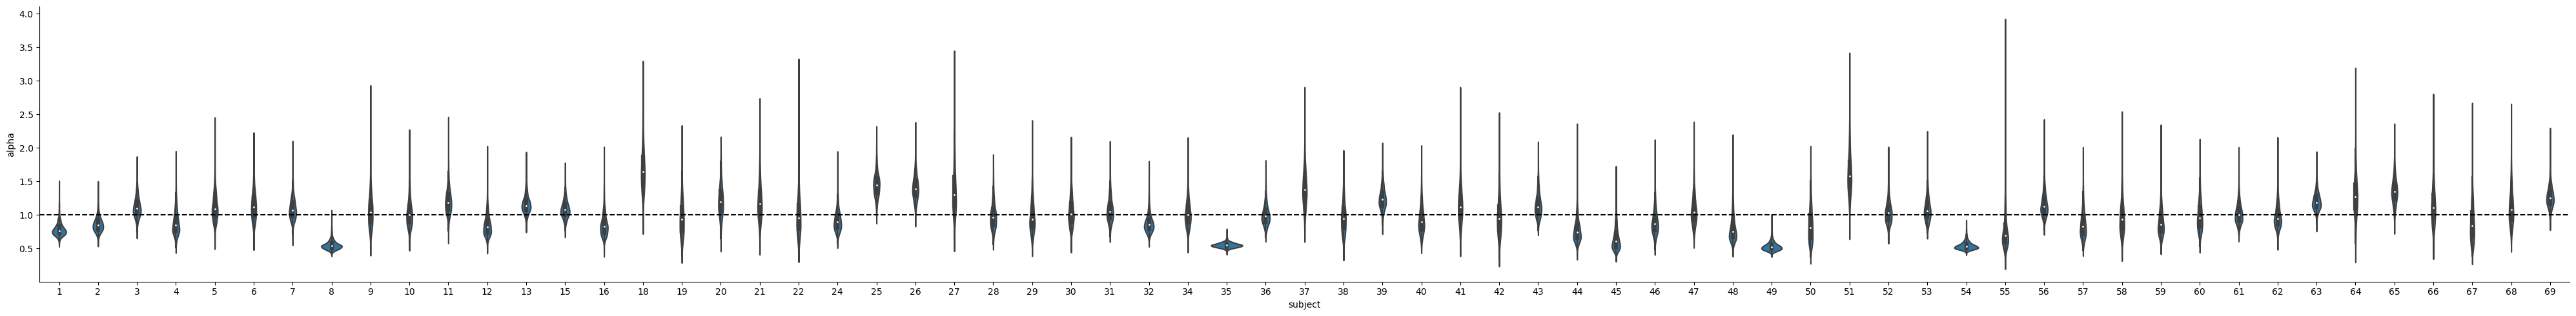

In [127]:
plot_subjectwise_posterior(traces['model 5'], 'alpha', ref_value=1.0)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


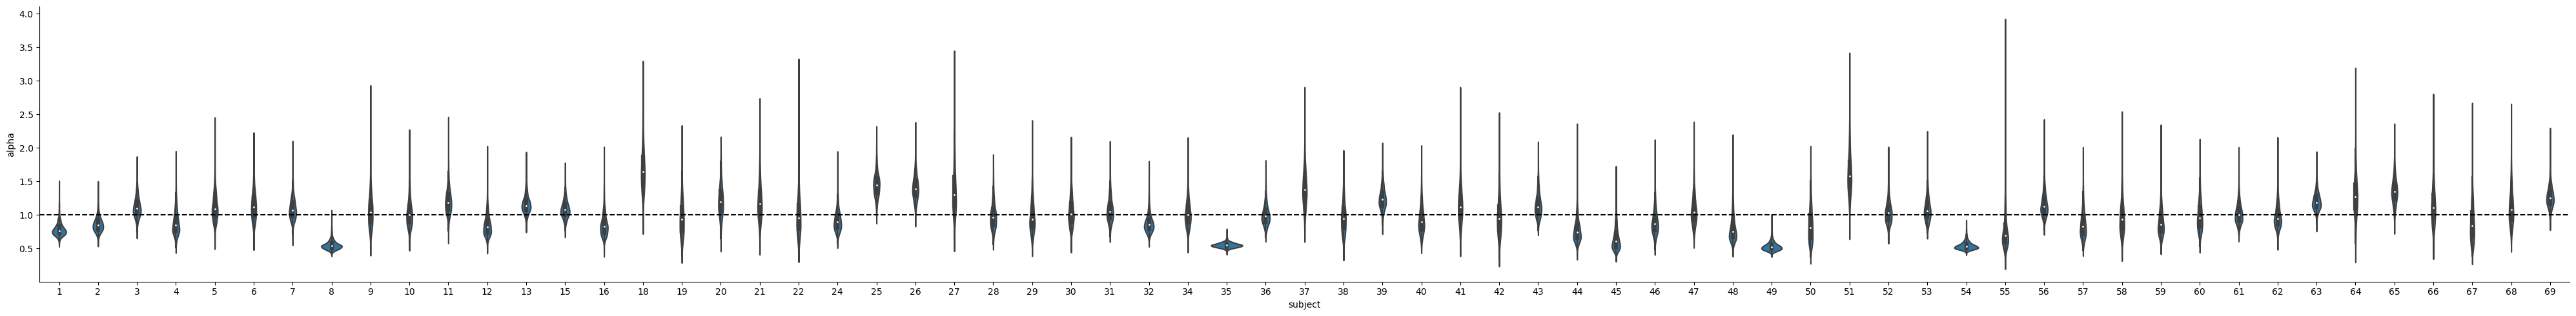

In [128]:
plot_subjectwise_posterior(traces['model 5'], 'alpha', ref_value=1.0)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


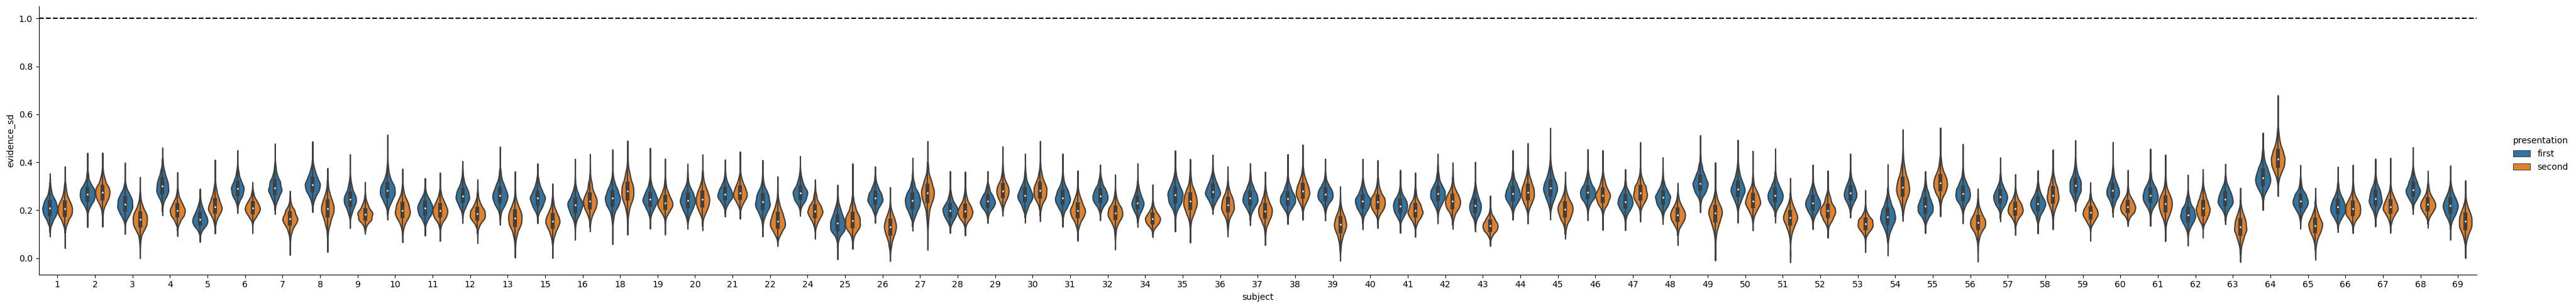

In [129]:
plot_subjectwise_posterior(traces['model 5'], 'evidence_sd', ref_value=1.0, hue='presentation')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


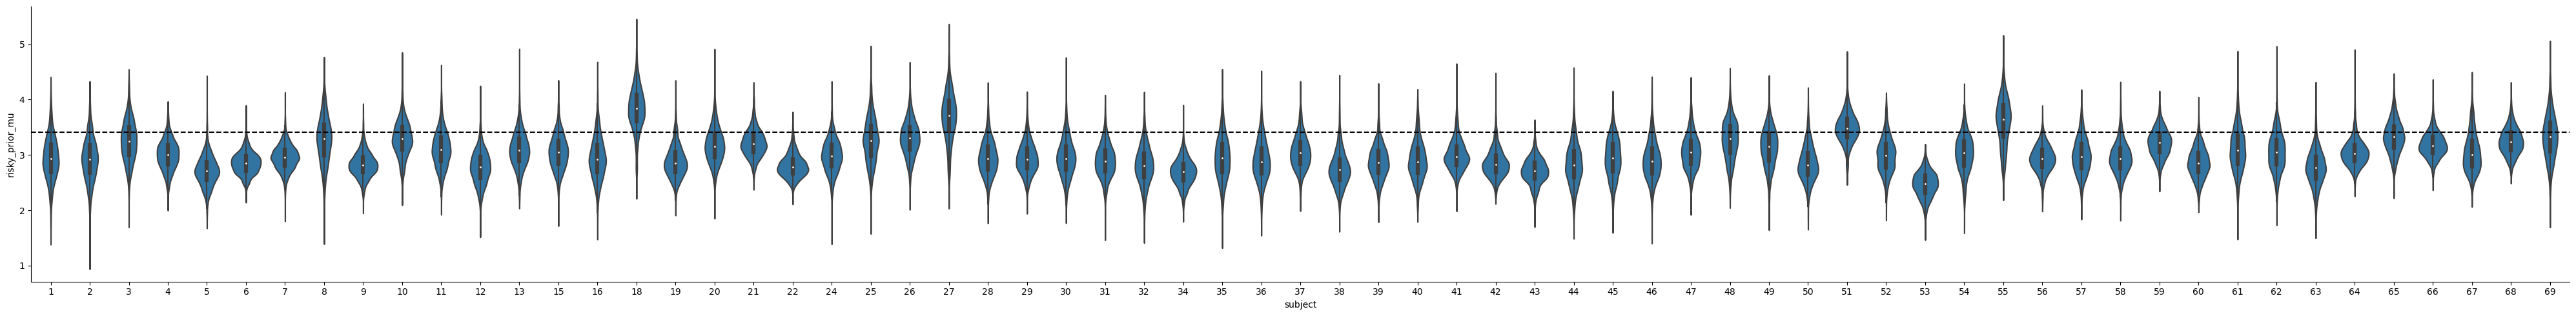

In [134]:
plot_subjectwise_posterior(traces['model 5'], 'risky_prior_mu', ref_value=np.log(df['n_risky']).mean())

In [136]:
model = EvidenceModelTwoPriorsDiminishingUtility(df)

In [141]:
jjjtrace =traces['model 5']

In [273]:
from re import I


def get_subjectwise_summmary(model, trace):

    pars = model.free_parameters.keys()

    ps = []
    for par in pars:

        t = trace.posterior[par].to_dataframe()
        groupby = list(set(t.index.names) - set(['chain', 'draw']))

        p_mean = t.groupby(groupby).mean()

        coords = model.coords
        coords = {k: v for k, v in coords.items() if k in groupby}

        hdi = az.hdi(trace.posterior[par], coords=coords).to_dataframe()

        for element in groupby:
            if element != 'subject':
                p_mean = p_mean.unstack(element)
                p_mean.columns = [' - '.join(c) for c in p_mean.columns]
                hdi = hdi.unstack(element)
                hdi.columns = [' - '.join(c) for c in hdi.columns]

        p_mean = pd.concat((p_mean,), axis=1, keys=['mean']).reorder_levels([1, 0], axis=1)
        hdi = hdi.unstack('hdi')

        ps.append(pd.concat((p_mean, hdi), axis=1))

    return pd.concat(ps, axis=1).sort_index(axis=1)

In [296]:
tmp = get_subjectwise_summmary(model, trace)
tmp = tmp.xs('mean', 1, 1)

In [297]:
tmp['mean_risky'] = np.log(df.groupby(['subject']).mean())['n_risky']

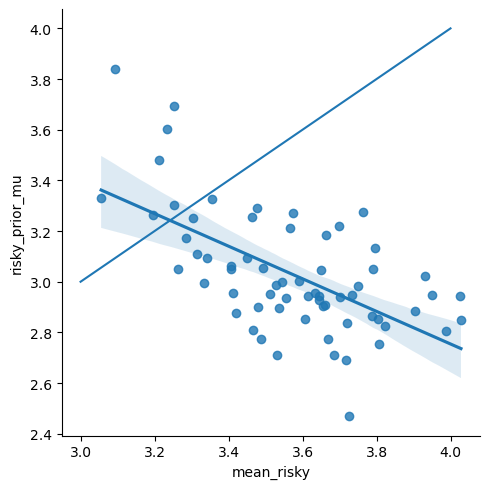

In [302]:
sns.lmplot(tmp, x='mean_risky', y='risky_prior_mu')
plt.plot([3.0, 4.], [3.0, 4.])

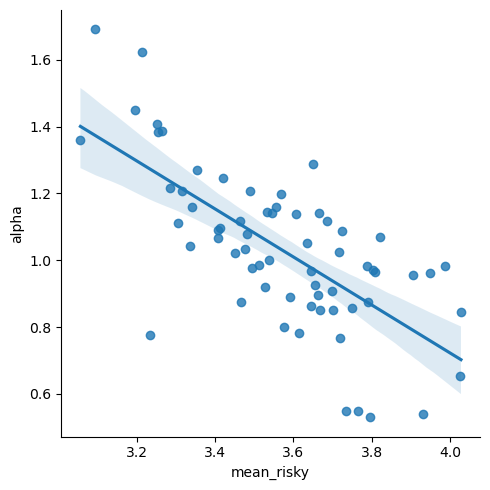

In [300]:
sns.lmplot(tmp, x='mean_risky', y='alpha')

In [304]:
(tmp['alpha'] > 1.0).mean()

0.5230769230769231

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_96979/4151029780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['alpha'])


<AxesSubplot: xlabel='alpha', ylabel='Density'>

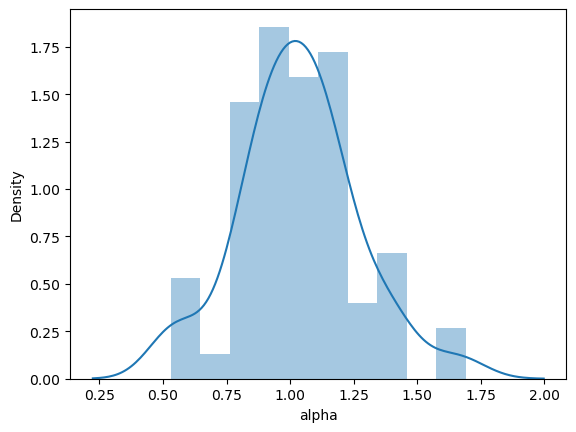

In [303]:
sns.distplot(tmp['alpha'])



In [19]:
df = get_all_behavior()

In [24]:
ref_value = df.index.unique('subject').to_frame()
ref_value[:] = 1.0

ref_valueV

,subject
subject,
1,1
2,1
3,1
4,1
5,1
...,...
65,1
66,1
67,1
